In [1]:
# Import the libraries
import numpy as np

In [2]:
# Build the market
# Bond
B1 = np.array([11, 11]) # Payoff
B0 = 10 # Price
# Stock
S1 = np.array([20, 5]) # Payoff
S0 = 10 # Price

In [3]:
# Payoffs at time T = 1
M1 = np.array([B1, S1]).T
M1

array([[11, 20],
       [11,  5]])

In [4]:
# Prices at time t = 0
M0 = np.array([B0, S0]).reshape(1, 2)
M0

array([[10, 10]])

In [5]:
# Payoff of the call option at time T = 1
K = 10 # Strike price
C1 = np.maximum(S1 - K, 0)
C1 = C1.reshape(2, 1)
C1

array([[10],
       [ 0]])

In [6]:
# Plot the payoff of the call
import matplotlib.pyplot as plt

In [7]:
# Tabulate the function for x = 0, 1, ..., 20
x = np.arange(21)
y = np.maximum(x - K, 0)

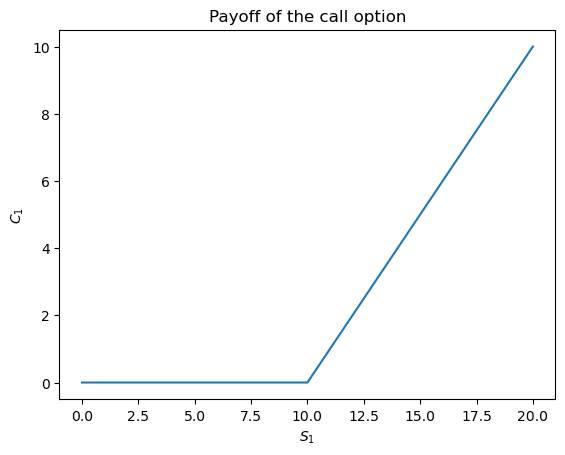

In [8]:
plt.title('Payoff of the call option')
plt.xlabel('$S_1$')
plt.ylabel('$C_1$')
plt.plot(x, y)

In [9]:
# Verify that this is a complete market
r = np.linalg.matrix_rank(M1)
rows, cols = M1.shape

In [10]:
if r == rows:
    print('The market is complete')
else:
    print('The market is incomplete')

The market is complete


In [11]:
if r == rows and r == cols:
    print('No redundant assets')

No redundant assets


In [12]:
# Replication of the payoff of the call
M1inv = np.linalg.inv(M1)
theta = M1inv @ C1
theta

array([[-0.3030303 ],
       [ 0.66666667]])

In [13]:
# Proof of replication
M1 @ theta

array([[10.],
       [ 0.]])

In [14]:
# No-arbitrage price of the call
C0 = M0 @ theta
C0 = C0[0, 0]
C0

3.6363636363636362

In [15]:
# Otherwise we use the dot product
C0 = M0.dot(theta)
C0 = C0[0, 0]
C0

3.6363636363636362

In [16]:
# Create the random generator with NumPy
from numpy.random import default_rng

In [17]:
# Set the seed (for reproducibility)
rng = default_rng(100)

In [18]:
# Generate 1000 random portfolios
n = 1000
b = rng.uniform(low=-2, high=2, size=n)
a = rng.uniform(low=-2, high=2, size=n)

In [19]:
# Create a list of payoffs (of portfolios)
payoffs = []

for i in range(n):
    payoffs.append(b[i] * B1 + a[i] * S1)

# Transform the list in an array
payoffs = np.array(payoffs)
payoffs

array([[ 17.44928301,  15.41671456],
       [ 43.43184736,  14.04424473],
       [-15.40243263, -10.81812118],
       ...,
       [  8.78823461,  13.08449426],
       [-39.31237027, -25.37855948],
       [  4.74643848, -10.01064966]])

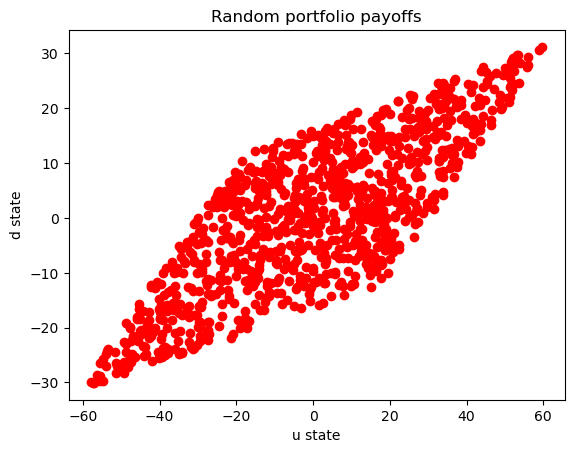

In [20]:
# Plot the portfolio payoffs (as points in the plain)
plt.clf()
plt.title('Random portfolio payoffs')
plt.xlabel('u state')
plt.ylabel('d state')
plt.scatter(payoffs[:, 0], payoffs[:, 1], c='red')